<h3>Kaggle Competition; Home Credit Default Risk</h3>

Beginner reference: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction


In [1]:
# Import packages
import os
import numpy as np
import pandas as pd

# Import matplot packages for visualizations
import matplotlib.pyplot as plt

<h3>Loading data</h3>
- Store input data in same folder as Jupyter notebook
- Read csv file into pd dataframe

In [2]:
# Use file_path if file is not stored in same directory as the notebook
file_path = 'data/application_train.csv'

# Reading csv file and store into a pandas dataframe called app_train
app_train = pd.read_csv(file_path)

# Print the dimension of the dataframe 
# Training data shape:(307511, 122) == Rows = 307,511 and columns = 221
print('Training data shape: ', app_train.shape)

# head(): Print first 5 rows
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Check data type for app_train
type (app_train)

pandas.core.frame.DataFrame

<h3>Data Exploration</h3>

In [4]:
# Get list of column names and display
app_train_col_name = app_train.columns
for col in app_train_col_name:
    print(col)


SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APART

In [5]:
# Count total 0's and 1's for TARGET column
# 0 - paid on time
# 1 - didnt pay on time
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

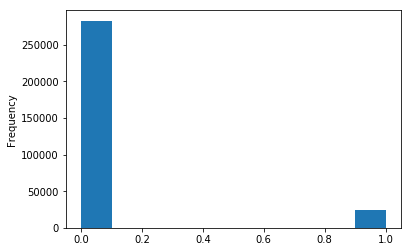

In [6]:
# Plotting 0 vs 1 histogram chart
app_train['TARGET'].astype(int).plot.hist();

In [7]:
app_train_target = app_train['TARGET'].value_counts()

target_untimely = app_train_target[1]
target_timely = app_train_target[0]

target_untimely_ratio = target_untimely / (target_untimely + target_timely)
target_timely_ratio = 1 - target_untimely_ratio

print ('Loan paid on time ratio: ' + str(target_timely_ratio))
print ('Loan not paid on time ratio: ' + str(target_untimely_ratio))

Loan paid on time ratio: 0.9192711805431351
Loan not paid on time ratio: 0.08072881945686496
